# Far-field radiation patterns of a double-couple point source
_Computational Seismology, Igel (2016)_ <br>
Exercise 2.28

_Plot the 3D radiation patterns $A_x$ for P and S far-field energy:_

$$\begin{align}
\vec{A}^{FP} &= sin(2\theta)cos(\phi) \; \hat{r} \\
\vec{A}^{FS} &= cos(2\theta)cos(\phi) \; \hat{\theta} - cos(\theta)sin(\phi) \; \hat{\phi}
\end{align}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D   # needed to change viewing angle of 3D plots

In [2]:
phi = np.linspace(0, 2*np.pi, 200)
theta = np.linspace(0, np.pi, 200)

def a_fp(phi, theta):
    return np.sin(2*theta)*np.cos(phi)

# def a_fs(phi, theta):
#     return np.sqrt((np.cos(2*theta)*np.cos(phi))**2 + (np.cos(theta*np.sin(phi)))**2)

def a_fs_phi(phi, theta):
    return np.cos(2*theta)*np.cos(phi)
    
def a_fs_theta(phi, theta):
    return -np.cos(theta)*np.sin(phi)

# coordinate transform
def to_cartesian(r, phi, theta):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    return [x, y, z]

# make mesh
PHI, THETA = np.meshgrid(phi, theta)

# calculate radiation pattern terms
A_FP = a_fp(PHI, THETA)
#A_FS = a_fs(PHI, THETA)

A_FS = np.sqrt(a_fs_phi(PHI, THETA)**2 + a_fs_theta(PHI, THETA)**2)

# do coordinate transforms
x_p, y_p, z_p = to_cartesian(A_FP, PHI, THETA)
x_s, y_s, z_s = to_cartesian(A_FS, PHI, THETA)


Text(0.5, 0.92, 'P-wave radiation pattern')

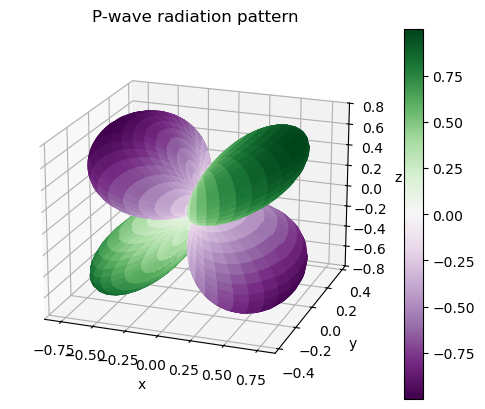

In [3]:
# P-wave pattern
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
norm = colors.Normalize(vmin = np.min(A_FP), vmax = np.max(A_FP))
surface_p = ax2.plot_surface(x_p, y_p, z_p, cmap = 'PRGn', facecolors = cm.PRGn(norm(A_FP)))
ax2.view_init(elev=20, azim=-70)   # change viewing angle
cbar = fig2.colorbar(plt.cm.ScalarMappable(cmap = 'PRGn', norm = norm), ax = ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('P-wave radiation pattern')

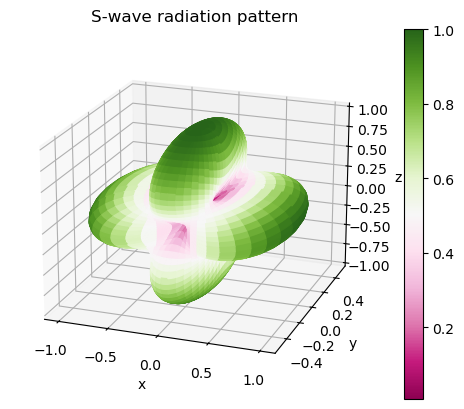

In [4]:
# S-wave pattern
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')
norm = colors.Normalize(vmin = np.min(A_FS), vmax = np.max(A_FS))
surface_p = ax3.plot_surface(x_s, y_s, z_s, cmap = 'PiYG', facecolors = cm.PiYG(norm(A_FS)))
ax3.view_init(elev=20, azim=-70) # change viewing angle
cbar = fig3.colorbar(plt.cm.ScalarMappable(cmap = 'PiYG', norm = norm), ax = ax3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('S-wave radiation pattern');